##Clasificación De radiografias de Neumonia 

Vamos a crear una red neuronal que nos ayude a clasificar radiografias de personas con neumonia, y personas que no tienen neumonia. 

Pirmero importamos las paqueterías que utilizaremos

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
#esta paquetería se utiliza para que la escrituran el python2 u otras versiones
#sean validas
import pandas as pd
#Manejo de datos

import tensorflow as tf
from tensorflow.keras import datasets,layers,models
#Tensor flow y keras se importan para crear y entrenar la red neuronal

import matplotlib.pyplot as plt
#paquetería que nos ayudará a graficar algunos resultados

import numpy as np # Manejo de arreglos y funciones matemáticas numericacas
import os # Manejo de carpetas y archivos para ingresar nuestra data

from tqdm import tqdm
#La paquetería tqdm nos ayuda a visualizar una barra de carga de las imagenes

import cv2 #Nos ayudará a escalar imagenes si es necesario
from glob import glob

#estas paqueterias nos ayudaran a transformar la imagen 
import sklearn
import skimage
from skimage.transform import resize

#convierte las imagenes a cala de grises
from skimage.color import rgb2gray

#Nos ayudaran a observar sobre ajuste y un ajuste bajo.
import random
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#D

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Modificamos un poco el ejemplo para cargar los datos, de forma que, no sea necesario volver a cargar las imagenes cada vez que querramos ejecutar el código.

Para esto creamos la funcion 

```
def get_data(folder):
```
Cuando el valor de Load_images=True, entonces cargará las imagenes desde la ruta
de la carpeta chest_xray, y guardará las imagenes en forma de np.array en un 
archivo, donde se especifique la ruta, con el fin, de que no sea necesario
volver a cargar las imagenes, sino, solo las imagenes en forma de array.


In [ ]:
#Amesh
#especificamos la ruta de la carpeta chest_xray que contiene el dataset de las
#imagenes que necesitamos.
train_dir='/content/drive/MyDrive/Analitica_de_datos/chest_xray/train'
test_dir='/content/drive/MyDrive/Analitica_de_datos/chest_xray/test'

Load_images=False # cambia por True si quieres cargar las imagenes

#creamos la función get_data
def get_data(folder):
  x=[]
  y=[]
  for folderName in os.listdir(folder):
    if not folderName.startswith('.'):
      if folderName in ['NORMAL']:
        label=0
      elif folderName in ['PNEUMONIA']:
        label=1
      else:
        label=2
      for image_filename in tqdm(os.listdir(folder+'/'+folderName)):
        img_file=cv2.imread(folder+'/'+folderName+'/'+image_filename)
        if img_file is not None:
          #normalizamos las imagenes a (150x150) (con tre colores)
          img_file=skimage.transform.resize(img_file,(150,150,3),mode='constant',
                                            anti_aliasing=True)
          img_file=rgb2gray(img_file) #cambiamos las imagenes a escala de grises
          #es decir ahora tienen dimensiín (150,150)
          img_arr=np.asarray(img_file)
          x.append(img_arr)
          y.append(label)
  x=np.asarray(x)
  y=np.asarray(y)
  return x,y

if Load_images:
  x_train,y_train=get_data(train_dir)
  x_test,y_test=get_data(test_dir)
  #Grabamos los arrays
  np.save('/content/drive/MyDrive/Analitica_de_datos/imagenes_array_xray/x_train.npy',x_train)
  np.save('/content/drive/MyDrive/Analitica_de_datos/imagenes_array_xray/y_train.npy',y_train)
  np.save('/content/drive/MyDrive/Analitica_de_datos/imagenes_array_xray/x_test.npy',x_test)
  np.save('/content/drive/MyDrive/Analitica_de_datos/imagenes_array_xray/y_test.npy',y_test)
  print('carga exitosa')
else:
  x_train=np.load('/content/drive/MyDrive/Analitica_de_datos/imagenes_array_xray/x_train.npy')
  y_train=np.load('/content/drive/MyDrive/Analitica_de_datos/imagenes_array_xray/y_train.npy')
  x_test=np.load('/content/drive/MyDrive/Analitica_de_datos/imagenes_array_xray/x_test.npy')
  y_test=np.load('/content/drive/MyDrive/Analitica_de_datos/imagenes_array_xray/y_test.npy')
  print('carga exitosa')


carga exitosa


#Exploramos los datos
Vamos a explorar las imagenes que tenemos, por medio de graficas, y ver los valores que se pueden presentar en el ejercicio. 

1


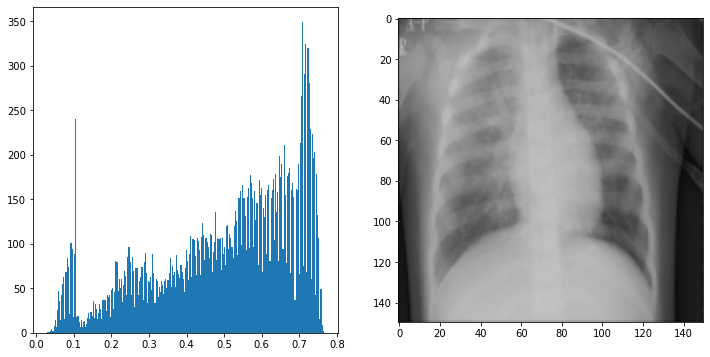

In [ ]:
def plotHistogram(a):
  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)
  plt.hist(a.ravel(),bins=255)
  plt.subplot(1,2,2)
  plt.imshow(a,cmap='gray',vmin=0,vmax=1)

plotHistogram(x_train[5])
print(y_train[5])

Podemos visualizar con ayuda de matplotlib un histograma de las imagenes, para ver la cantidad de pixeles de ciertos colores. En el eje y visualizamos la cantidad de pixeles y en el x de menor a mayor se ve de oscuro a claro respectivamente. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


{0: 'No neumonía', 1: 'Con Neumonía'}


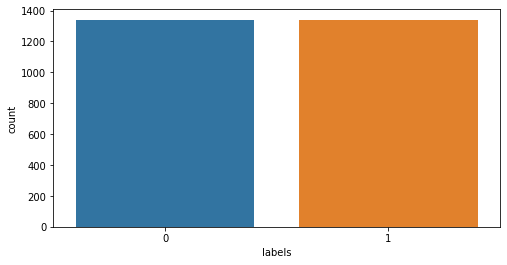

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,4))
map_characters={0:'No neumonía',1:'Con Neumonía'}
dict_character=map_characters

df=pd.DataFrame()
df['labels']=y_train
lab=df['labels']
dist=lab.value_counts()
sns.countplot(lab)
print(dict_character)

También podemos visualizar cuantos datos hay de personas con neumonía y de personas sin neumonia, y nos damos cuenta que son la misma cantidad. 

#Processamiento de datos
Vamos a normalizar un poco los datos, ya que en el preprocesamiento de datos (al cargar los datos) convertimos las images en escala de grises, se han perdido los 3 canales RGB de colores, que traía la imagen. Devolvemos un canal
con el fin de que no se pierda por completo la información de los colores

In [ ]:
x_trainreshaoped=x_train.reshape(len(x_train),150,150,1)
x_testreshaoped=x_test.reshape(len(x_test),150,150,1)
x_trainreshaoped.shape

(2682, 150, 150, 1)

#Creación del modelo y red neuronal
Crearemos un modelo secuencial de neuronas, se utilizará redes convolucionales
que son mas recomendadas para el análisis de imagen, a cada capa exceptuando la 
última, se le aplicará, una función de activación 'relu' y en la capa de salida
se aplicará una función 'softmax', que teoricamente ayudaría al modelo en su última capa de una manera efectiva, para curvar la linea de aprendizaje. 

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,1)))
#se crea una capa input, que recibirá una entrada de imagenes de (150,150,1)
#y en seguida, aparecerá una capa con 64 neuronas con función de activación 'relu
#el parámitro strides=(3,3) especifica los pasos de la convolución a lo largo y ancho
#de la imagen, es decir la lectura en linea de la imagen.

model.add(layers.MaxPool2D((2,2)))
#ahora se aplica una capa que reducirá el tamaño de la imagen (150,150) a (75,75)
#con el fin de conservar las caracteristicas'únicas' de la imagen y repetir el proceso

model.add(layers.Conv2D(64,(3,3),activation='relu'))
#aplicamos nuevamente una capa convolucional de 64 neuronas con activación 'relu'
model.add(layers.MaxPool2D((2,2)))
#se vuelve a dividir el tamaño de la imagen de (75,75) a (37,37)
model.add(layers.Conv2D(64,(3,3),activation='relu'))
#se aplica otra capa con 64 neuronas de red convolucional

model.add(layers.Flatten())
#se aplica una capa que convierte los elementos de la matriz de imagenes a 
#un array plano

model.add(layers.Dense(64,activation='relu'))
#ahora aplicamos una capa de red neuronal 'normal' con 64 neuronas y fa 'relu'

model.add(layers.Dense(2,activation='softmax'))
#por último aplicamos la capa output, que tendra que darnos dos valores 
#0 o 1 (neomonia o no neomonia) con lo cual es necesario solo 2 neuronas de una
#red neuronal normal. Y le aplicamos la función softmax que teoricamente ayudaria
#a curvar las regresiones realizadas

model.summary()
#revisamos la creación de la red

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                4

#compilación y entrenamiento del modelo
Antes de entrenar el modelo, debemos compilarlo con ciertos parámetros para que 
mi modelo tome los rates de aprendizaje, los valores de perdida, y la medida
de lo que quiero precisar.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


'adam' es un optimizador por defecto de la paquetería queras, sus valores por defecto son 
```
tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
    **kwargs
)
```
existen otros optimizers como 'adagrad', 'SGD', cuyos parámetros se acomodan mejor a ciertos data sets. En este ejemplo el recomendado es 'Adam'.




Ahora vamos a entrenar nuestro modelo, y a la par, ir validando la 'accuracy' (precisión) real del modelo respecto a los datos de entrenamiento. 

In [ ]:
model.fit(x_trainreshaoped,y_train,
          epochs=4,
          validation_data=(x_testreshaoped,y_test))

Epoch 1/4
84/84 [==============================] - 11s 41ms/step - loss: 0.7378 - accuracy: 0.6734 - val_loss: 0.3204 - val_accuracy: 0.8590
Epoch 2/4
84/84 [==============================] - 3s 33ms/step - loss: 0.1707 - accuracy: 0.9349 - val_loss: 0.5520 - val_accuracy: 0.8013
Epoch 3/4
84/84 [==============================] - 3s 33ms/step - loss: 0.1569 - accuracy: 0.9383 - val_loss: 0.7719 - val_accuracy: 0.7869
Epoch 4/4
84/84 [==============================] - 3s 33ms/step - loss: 0.0892 - accuracy: 0.9653 - val_loss: 0.6625 - val_accuracy: 0.7997


#Finalizando el modelo
ahora, veremos la matriz de confusión y aplicaremos la predicción en las imagenes de prueba (test). 

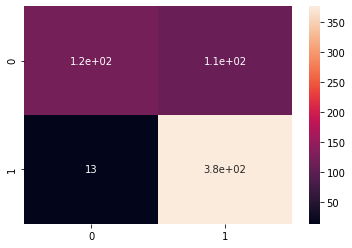

In [ ]:
from sklearn.metrics import confusion_matrix #nos ayudará a crear la matriz de confusión
predict=model.predict(x_testreshaoped)
predictargmax=np.argmax(predict,axis=1)
mc=confusion_matrix(y_test,predictargmax)
sns.heatmap(mc, annot=True)

Acá vemos que la predicción de las personas con neomonia es buena, pero las persona normales, tiende a equivocarse. 